In [17]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2 as BaseModel
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.saving import load_model

import matplotlib.pyplot as plt

# ensure GPU is used if available
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

TensorFlow Version: 2.14.1
GPU Available: []


In [18]:
# Define Paths and Parameters
train_dir = 'dataset/train'
test_dir = 'dataset/test'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

In [19]:
# Data Augmentation and Loading
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 4242 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


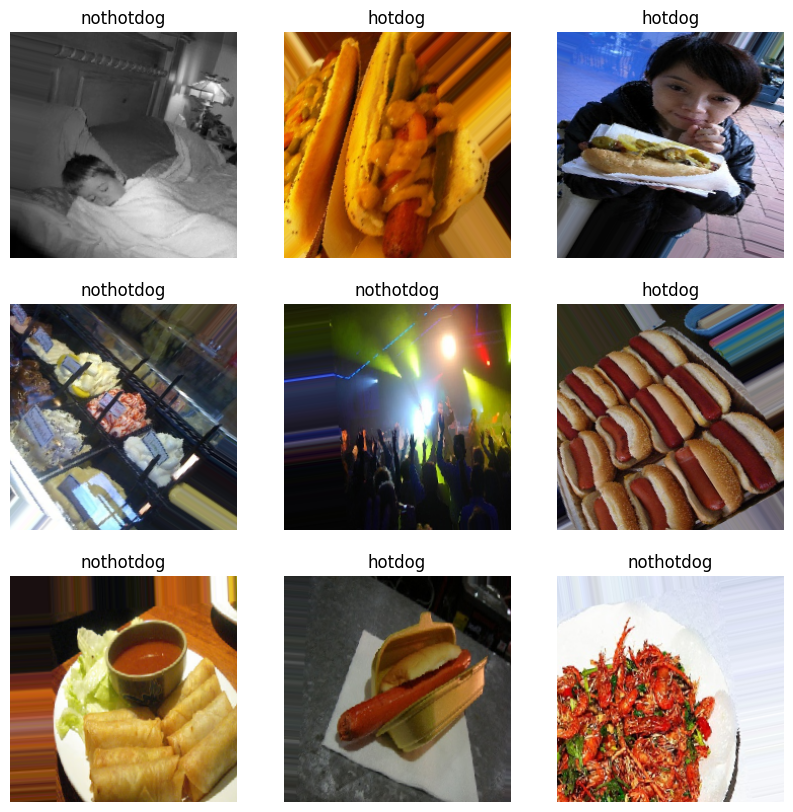

In [20]:
# Visualize Augmented Images
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f"{'hotdog' if y_batch[i] == 0 else 'nothotdog'}")
    plt.axis('off')

plt.show()

In [21]:
# Define the Model
base_model = BaseModel(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = True

# freeze first 100 layers
for layer in base_model.layers[:100]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1862721 (7.11 MB)
Non-trainable params: 396544 (1.51 MB)
_________________________________________________________________


In [22]:
# Train the Model and Save the Best Checkpoint
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    callbacks=[
        ModelCheckpoint(
            filepath="models/hotdog_classifier",
            monitor="val_accuracy",
            save_best_only=True,
            mode="max"
        )
    ]
)

Epoch 1/10
133/133 [==============================] - ETA: 0s - loss: 0.6658 - accuracy: 0.6426INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


133/133 [==============================] - 35s 257ms/step - loss: 0.6658 - accuracy: 0.6426 - val_loss: 0.4654 - val_accuracy: 0.8000
Epoch 2/10
133/133 [==============================] - ETA: 0s - loss: 0.4454 - accuracy: 0.7937INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


133/133 [==============================] - 36s 272ms/step - loss: 0.4454 - accuracy: 0.7937 - val_loss: 0.3488 - val_accuracy: 0.8550
Epoch 3/10
133/133 [==============================] - ETA: 0s - loss: 0.3709 - accuracy: 0.8390INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


133/133 [==============================] - 36s 268ms/step - loss: 0.3709 - accuracy: 0.8390 - val_loss: 0.3058 - val_accuracy: 0.8675
Epoch 4/10
133/133 [==============================] - ETA: 0s - loss: 0.3252 - accuracy: 0.8574INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


133/133 [==============================] - 35s 264ms/step - loss: 0.3252 - accuracy: 0.8574 - val_loss: 0.2888 - val_accuracy: 0.8825
Epoch 5/10
133/133 [==============================] - ETA: 0s - loss: 0.3137 - accuracy: 0.8623INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


133/133 [==============================] - 35s 262ms/step - loss: 0.3137 - accuracy: 0.8623 - val_loss: 0.2721 - val_accuracy: 0.8950
Epoch 6/10
133/133 [==============================] - 31s 232ms/step - loss: 0.3028 - accuracy: 0.8687 - val_loss: 0.2607 - val_accuracy: 0.8925
Epoch 7/10
133/133 [==============================] - ETA: 0s - loss: 0.2863 - accuracy: 0.8821INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


133/133 [==============================] - 34s 256ms/step - loss: 0.2863 - accuracy: 0.8821 - val_loss: 0.2572 - val_accuracy: 0.8975
Epoch 8/10
133/133 [==============================] - ETA: 0s - loss: 0.2478 - accuracy: 0.8960INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


INFO:tensorflow:Assets written to: models/hotdog_classifier/assets


133/133 [==============================] - 36s 272ms/step - loss: 0.2478 - accuracy: 0.8960 - val_loss: 0.2509 - val_accuracy: 0.9225
Epoch 9/10
133/133 [==============================] - 31s 234ms/step - loss: 0.2414 - accuracy: 0.8939 - val_loss: 0.2530 - val_accuracy: 0.9125
Epoch 10/10
133/133 [==============================] - 30s 223ms/step - loss: 0.2521 - accuracy: 0.8977 - val_loss: 0.2587 - val_accuracy: 0.9050


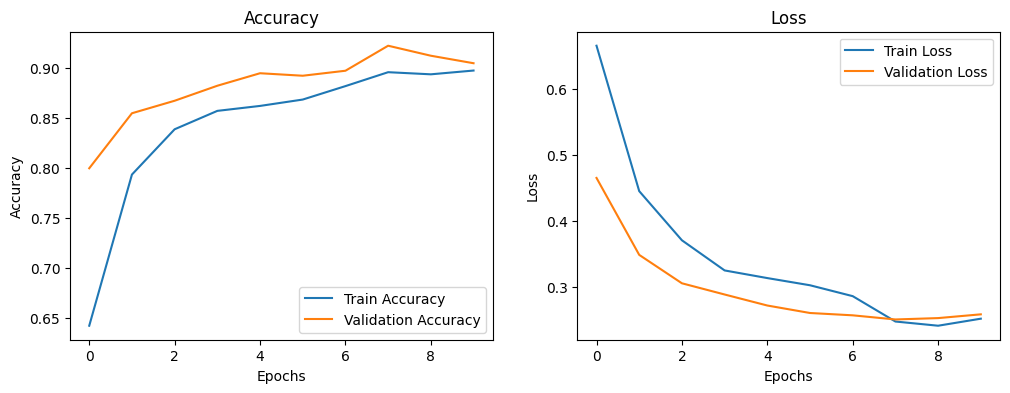

In [23]:
# Visualize Training Results
plt.figure(figsize=(12, 4))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
# Evaluate the best model
best_model = load_model("models/hotdog_classifier")
loss, accuracy = best_model.evaluate(test_generator)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

13/13 [==============================] - 2s 131ms/step - loss: 0.2509 - accuracy: 0.9225
Test Accuracy: 92.25%
